In [1]:
import os
import sys

sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from PIL import Image

In [3]:
%matplotlib inline

In [4]:
DATA_ROOT = '../data/cityscapes/gtProc'
print(os.path.exists(DATA_ROOT))

True


In [5]:
split = 'train'
city = 'aachen'
trainIds_name = 'aachen_000173_000019_gtFine_trainIds.png'
edge_name = 'aachen_000173_000019_gtProc_edge.tif'

In [6]:
trainIds_path = os.path.join(DATA_ROOT, split, city, trainIds_name)
edge_path = os.path.join(DATA_ROOT, split, city, edge_name)

assert os.path.exists(trainIds_path)
assert os.path.exists(edge_path)

In [7]:
GT_ROOT = '../data/cityscapes/gtFine'
labelIds_name = 'aachen_000173_000019_gtFine_labelIds.png'

In [8]:
labelIds_path = os.path.join(GT_ROOT, split, city, labelIds_name)
assert os.path.exists(labelIds_path)

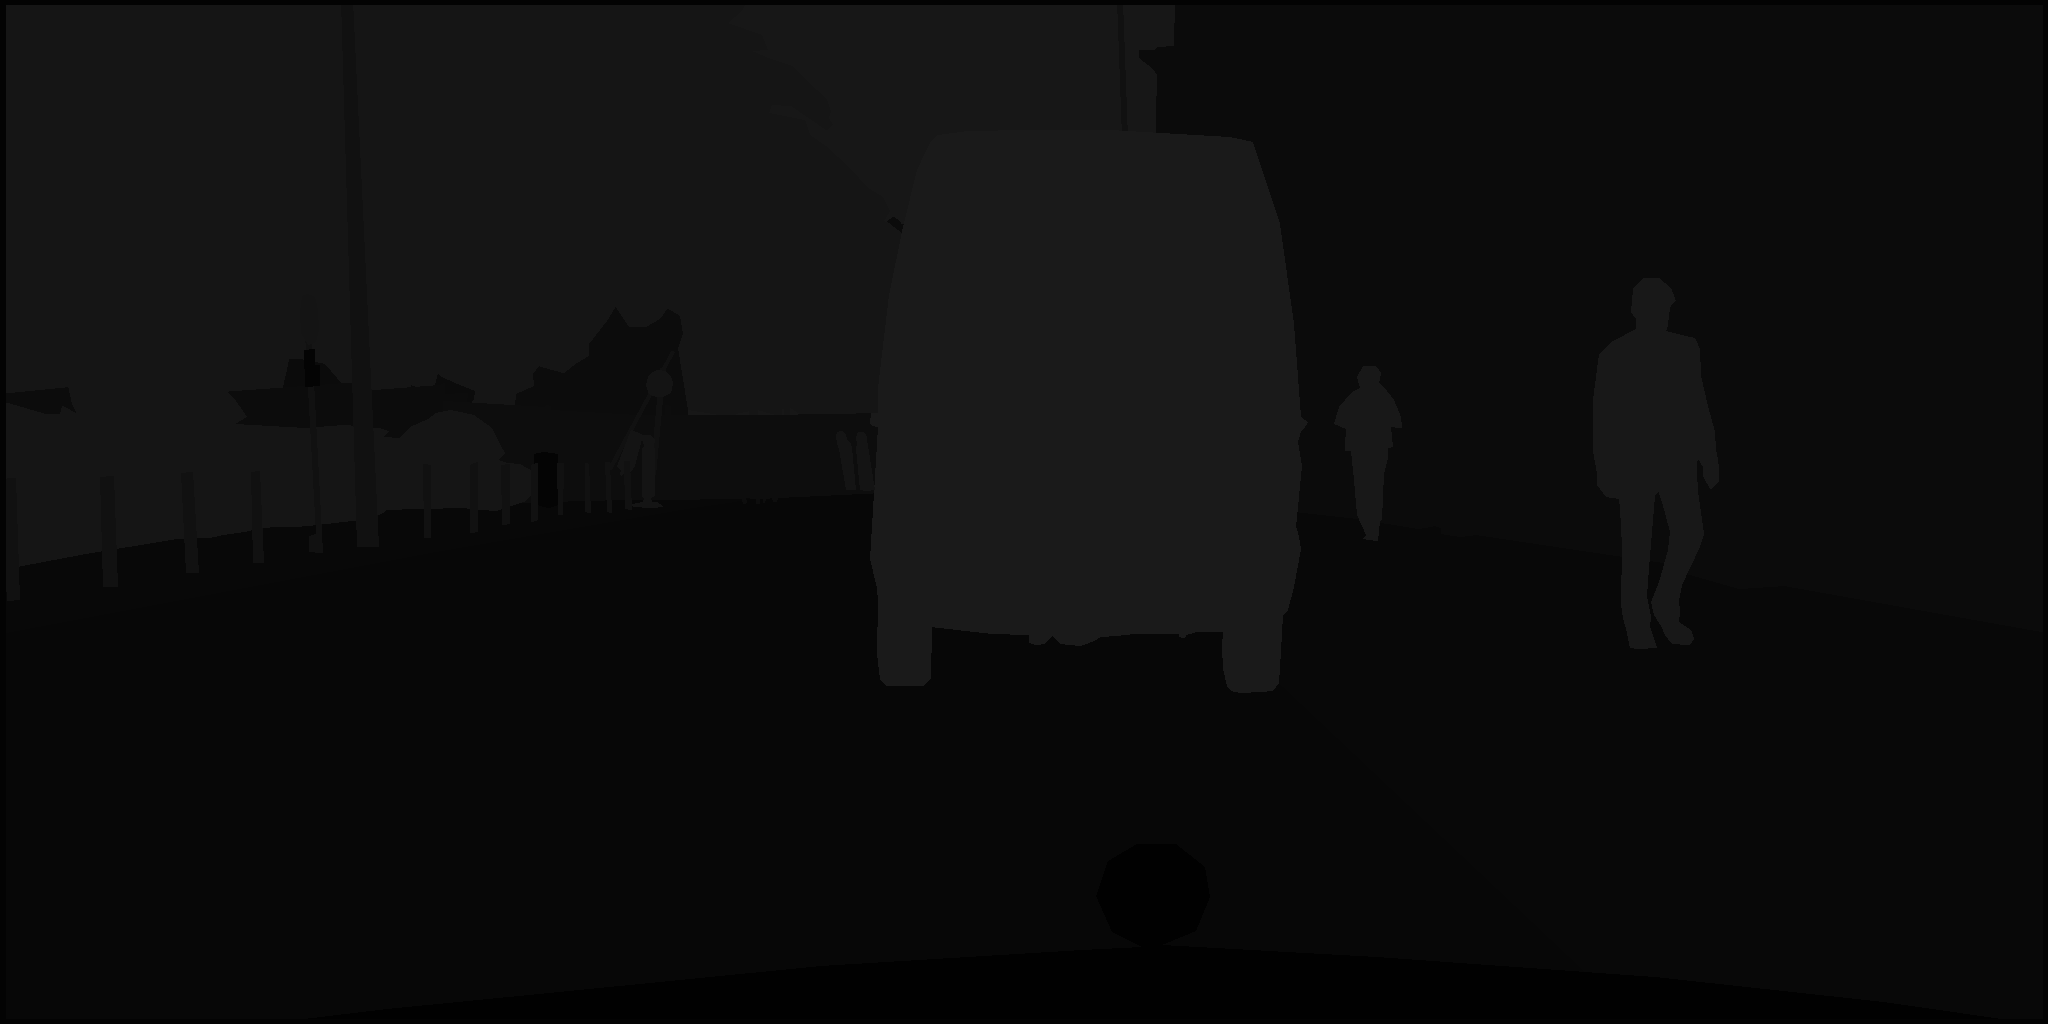

In [9]:
labelIds_img = Image.open(labelIds_path)
display(labelIds_img)

In [10]:
from preprocess.label2trainId import convert_label2trainId

In [11]:
_trainIds = convert_label2trainId(np.array(labelIds_img))

In [12]:
for i in range(19):
    print(i, np.any(_trainIds == i))

0 True
1 True
2 True
3 True
4 True
5 True
6 False
7 True
8 True
9 False
10 True
11 True
12 False
13 True
14 False
15 False
16 False
17 False
18 False


<PIL.PngImagePlugin.PngImageFile image mode=L size=2048x1024 at 0x7F33AC07A520>


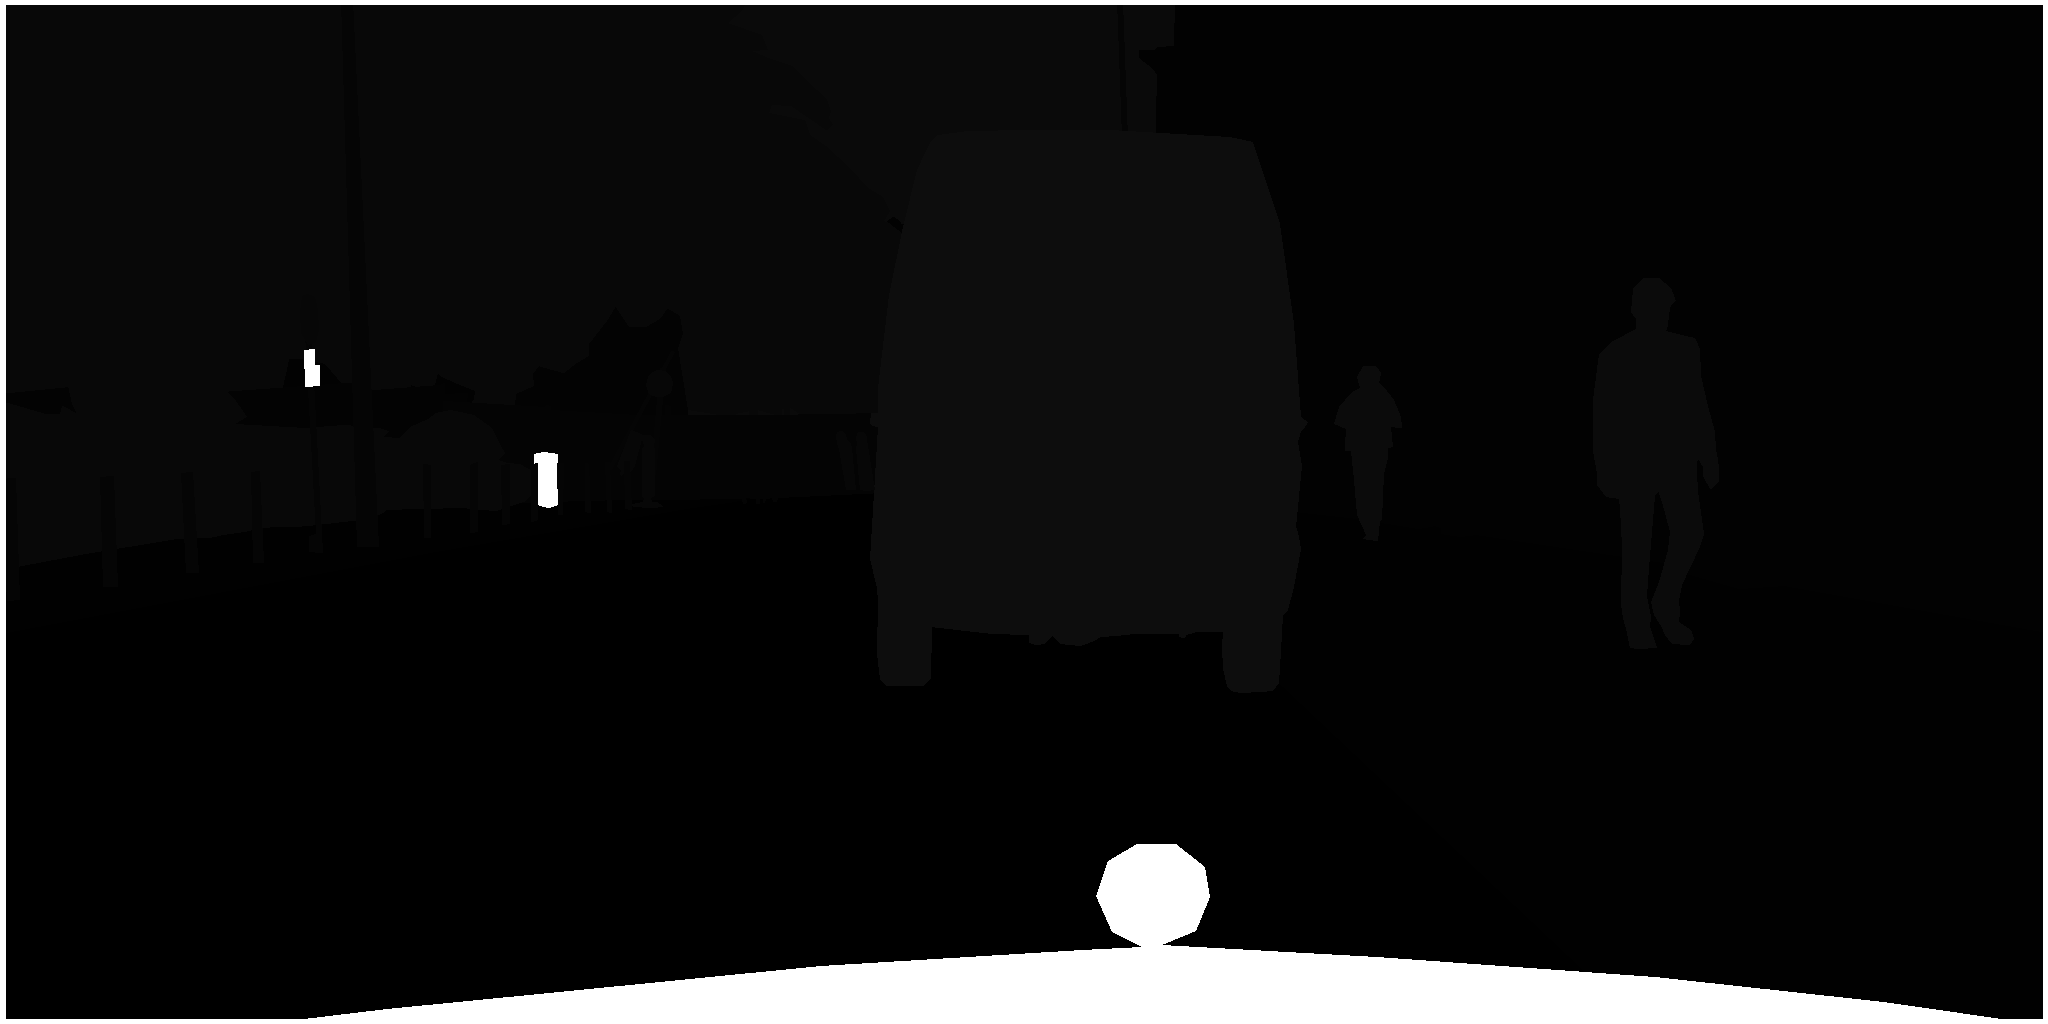

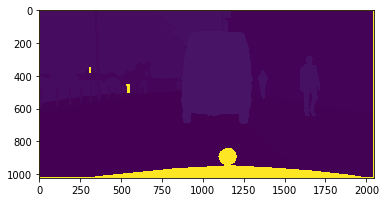

In [13]:
trainIds_img = Image.open(trainIds_path)
print(trainIds_img)
trainIds = np.array(trainIds_img)
display(trainIds_img)
plt.imshow(trainIds, interpolation='nearest')

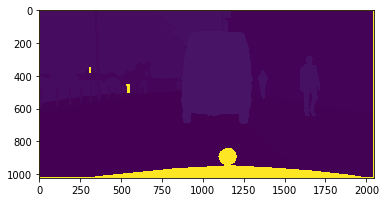

In [14]:
plt.imshow(_trainIds, interpolation='nearest')  # check

<PIL.TiffImagePlugin.TiffImageFile image mode=I size=2048x1024 at 0x7F336C51B850>


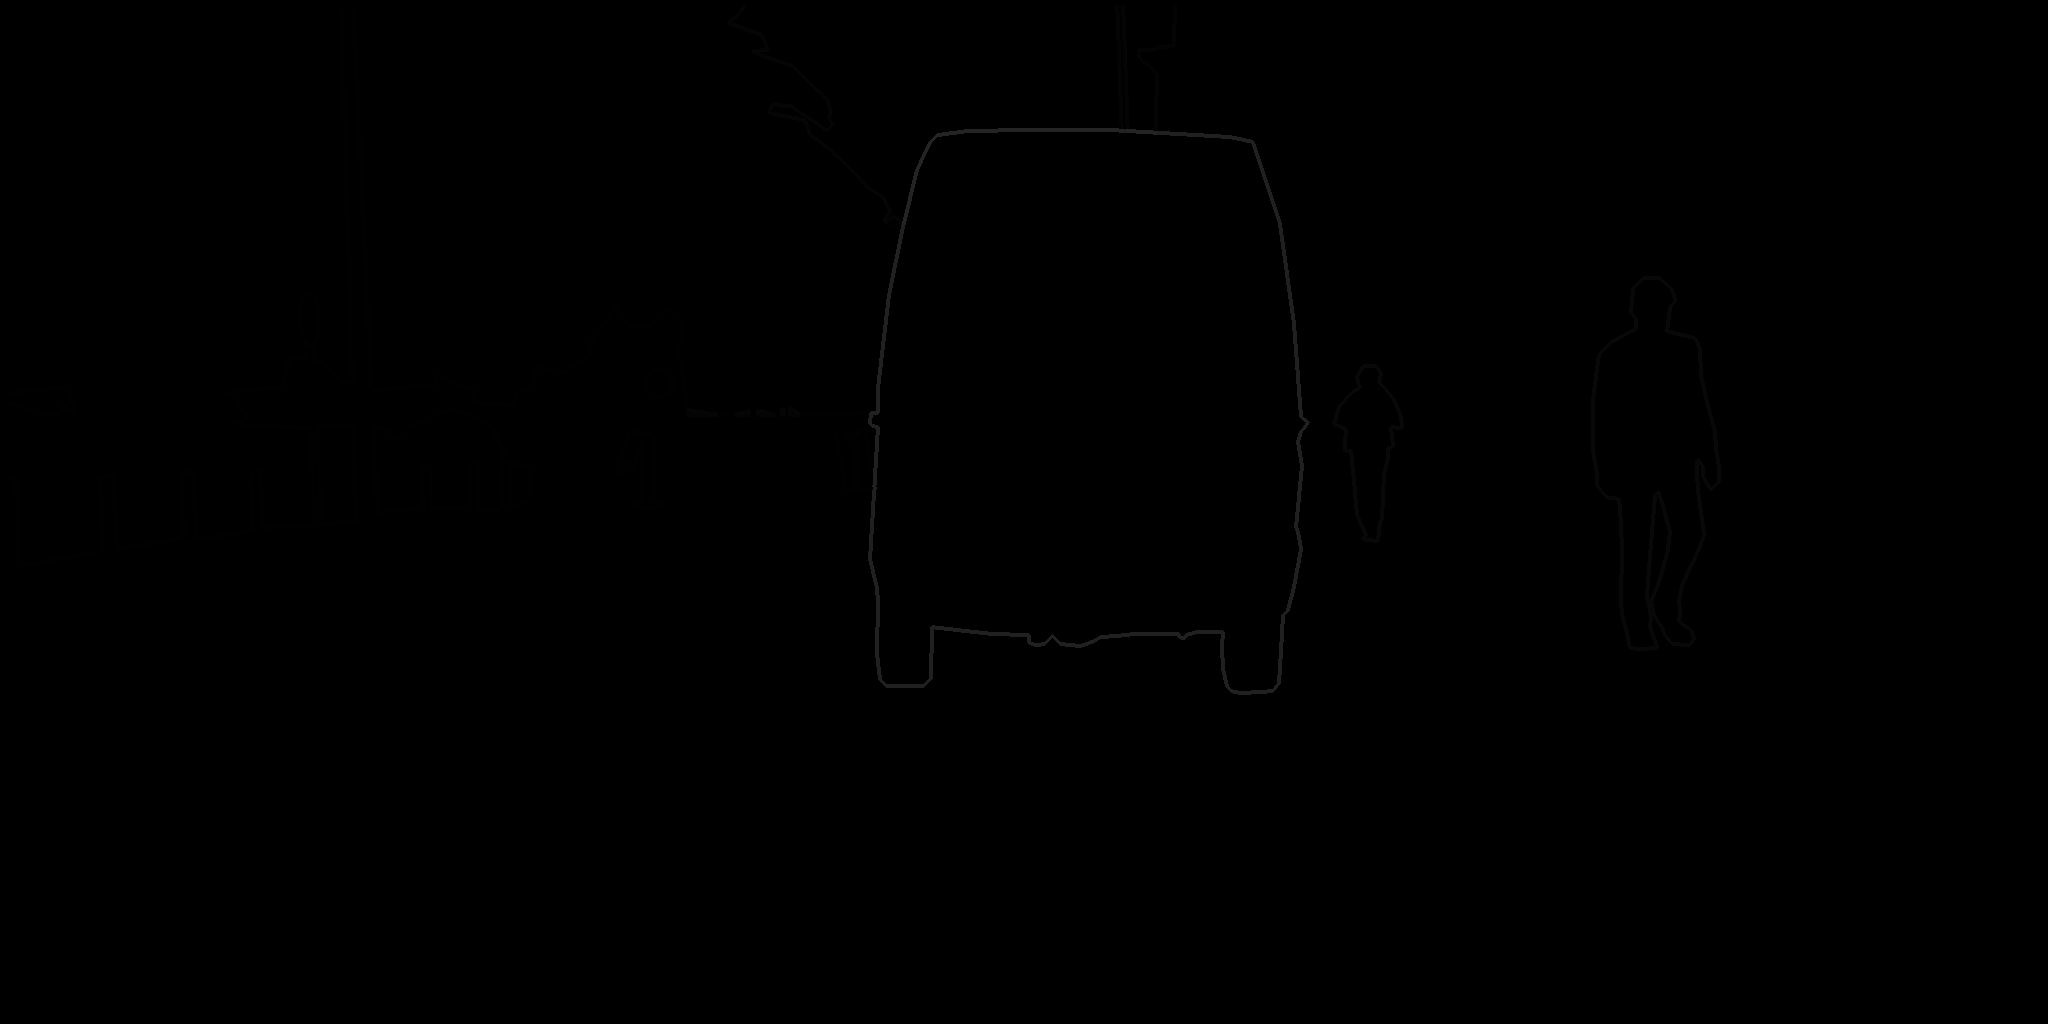

In [15]:
edge_img = Image.open(edge_path)
print(edge_img)
display(edge_img)

In [16]:
edge = np.array(edge_img).astype(np.uint32)

In [17]:
print(edge.shape)
print(edge.dtype)

(1024, 2048)
uint32


In [18]:
_edge = edge[:, :, None] 

In [19]:
_edge = np.unpackbits(
        _edge.view(np.uint8),
        axis=2,
        count=19,
        bitorder='little',
    )

In [20]:
print(_edge.dtype, _edge.shape)

uint8 (1024, 2048, 19)


In [21]:
out = np.ones_like(edge, dtype=np.uint8) * 255

h, w = edge.shape

for i in range(h):
    for j in range(w):
        cat = _edge[i, j, :]
        if sum(cat) < 1:
            continue
        out[i][j] = (np.argmax(cat) / 19 * 255).astype(np.uint8)

rounded = out
# rounded = np.argmax(_edge, axis=-1)
# rounded = (rounded / 18) * 255
# rounded = rounded.astype(np.uint8)
# print(rounded.shape)
# print(rounded.dtype)

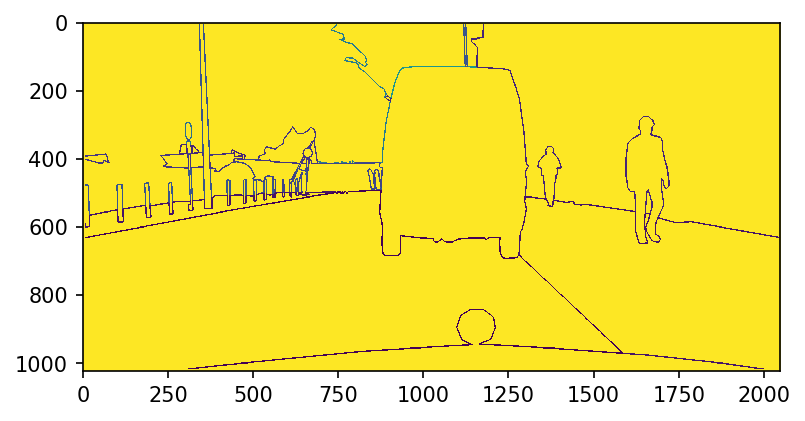

In [22]:
plt.imshow(rounded, interpolation='nearest')
plt.gcf().set_dpi(150)

In [23]:
all_edge = edge.astype(bool).astype(np.uint8)

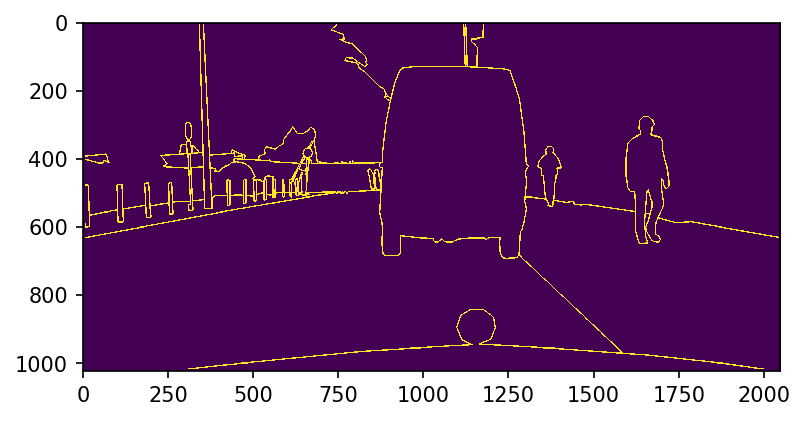

In [24]:
plt.imshow(all_edge, interpolation='nearest')
plt.gcf().set_dpi(150)

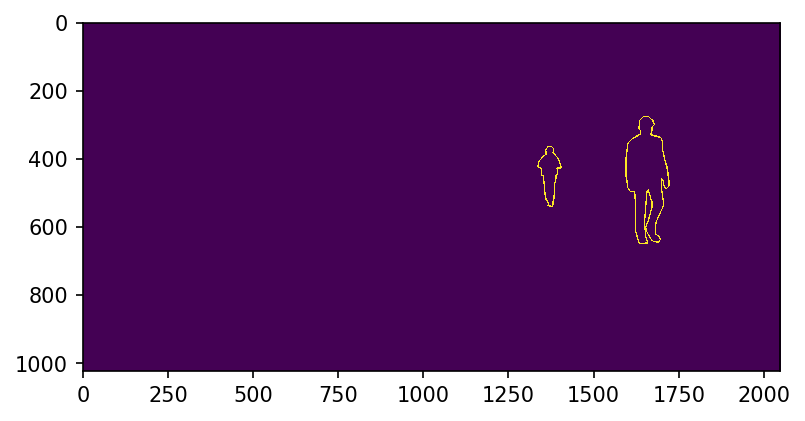

In [25]:
_id = 11
class_edge = _edge[..., _id]
plt.imshow(class_edge, interpolation='nearest')
plt.gcf().set_dpi(150)

# Check against GT edges (binary file)

In [26]:
GT_EDGES_ROOT = os.path.join('/', 'home', 'ubuntu', 'data', 'edge', 'cityscapes-preprocess', 'data_proc', 'gtFine')
assert os.path.exists(GT_EDGES_ROOT), GT_EDGES_ROOT

In [27]:
bin_name = 'aachen_000173_000019_gtFine_edge.bin'
bin_edge_path = os.path.join(GT_EDGES_ROOT, split, city, bin_name)
assert os.path.exists(bin_edge_path), bin_edge_path

In [28]:
from preprocess.encoding import loading_edge_bin

In [29]:
bin_edge = loading_edge_bin(bin_edge_path, 1024, 2048, 19)

In [30]:
np.array_equal(bin_edge, _edge)

True

In [31]:
gt_bin_edge = np.fromfile(bin_edge_path, dtype=np.uint32).reshape(1024, 2048)

In [32]:
np.array_equal(gt_bin_edge, edge)

True